In [166]:
%pylab inline
n=30;m=3;a=1.05
J=48
import numpy as np
import csv
file_root_jack='../CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all='../CovMatricesAll/'#_good/'../GoslingSphere/All/'
rr_true_file = '../weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = '../weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1.05,'Weight Matrix')

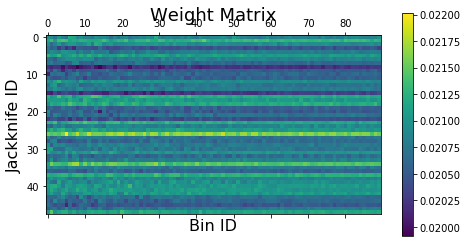

In [167]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Weight Matrix',fontsize=FS+2)

In [168]:
def read_RR_all(n,m,file_root,a,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

In [169]:
def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    cx=np.loadtxt(cxfile)
    errc4=np.loadtxt(errc4file)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,cx,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))
    c3=np.loadtxt(c3file)
    c4=np.loadtxt(c4file)
    errc4=np.loadtxt(errc4file)
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc4,c_tot

In [170]:
c2j,c3j,c4j,cxj,c4jerr,cj_tot=read_cj_all(n,m,file_root_jack,a)
c2,c3,c4,c4err,c_tot=read_c_all(n,m,file_root_all,a)

In [171]:
binct4=np.loadtxt(file_root_all+'binct_c4_n%d_m%d_full.txt'%(n,m))
binct2=np.loadtxt(file_root_all+'binct_c2_n%d_m%d_full.txt'%(n,m))

Text(0.5,1,'Bin Count for Elements of $C_2$ matrix')

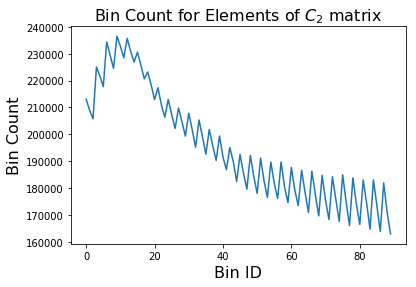

In [172]:
plt.plot(binct2);
plt.ylabel('Bin Count',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Elements of $C_2$ matrix',fontsize=FS)

Text(0.5,1,'Bin Count for Diagonal Elements of $C_4$ matrix')

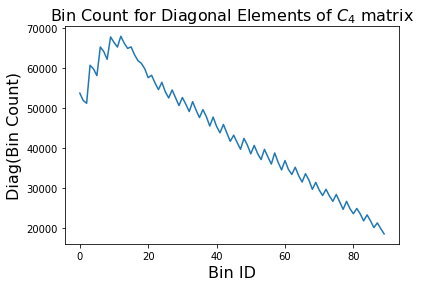

In [173]:
plt.plot(np.diag(binct4));
plt.ylabel('Diag(Bin Count)',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Diagonal Elements of $C_4$ matrix',fontsize=FS)

### Bin Count for $C_{4,ab}$ Matrix 

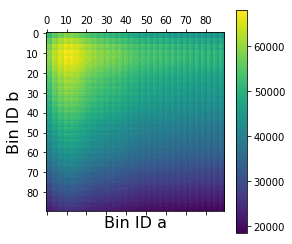

In [174]:
plt.matshow(binct4)
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS)
plt.colorbar()

In [175]:
rr_est,rr_true=read_RR_all(n,m,file_root_all,a)

# Total Matrices

### $C^J_{x,ab}$ plot

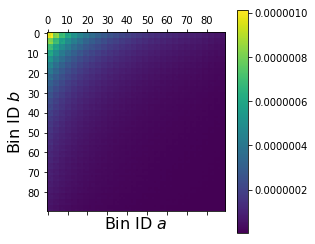

In [176]:
mat=cxj#c4j-cxj+c2j+c3j#_tot#c4j-cxj#_tot#c3ji#_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),100),vmin=np.percentile(mat.ravel(),0))
#plt.xlim([0,40]);plt.ylim([0,40])
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### $C_{\mathrm{tot},ab}$ plot

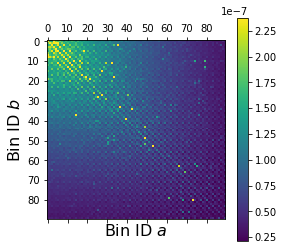

In [177]:
mat=c_tot#c4j-cxj+c2j+c3j#_tot#c4j-cxj#_tot#c3ji#_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),99.5),vmin=np.percentile(mat.ravel(),0.5))
#plt.xlim([0,40]);plt.ylim([0,40])
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

### Precision Matrix

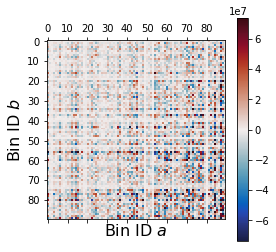

In [178]:
precision=np.linalg.inv(cj_tot)
import cmocean
cmap=cmocean.cm.balance
vmax=np.percentile(precision.ravel(),99.65)
plt.matshow(precision,vmax=vmax,vmin=-vmax,cmap=cmap)
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)

plt.colorbar(cmap=cmap)

## Small Region of $C_4$ matrix

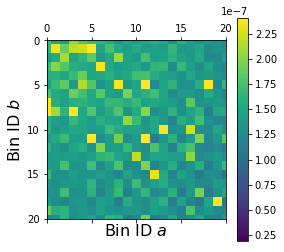

In [179]:
[vmax,vmin]=np.percentile(c4.ravel(),[99.75,0.25])
plt.matshow(c4,vmax=vmax,vmin=vmin)
plt.colorbar()
plt.xlim([0,20]);plt.ylim([20,0]);
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS);


## $C_2$ visualization

In [180]:
R_par=np.zeros(len(c2));
R_per=np.zeros(len(c2));
for i in range(len(c2)):
    rbin=50+i//m*(150.)/n+2.5
    mubin=(i%m)/float(m)+1/(2.*float(m))
    R_par[i]=rbin*mubin
    R_per[i]=rbin*np.sqrt(1.-mubin**2.)
RPAR,RPER=np.meshgrid(R_par,R_per)

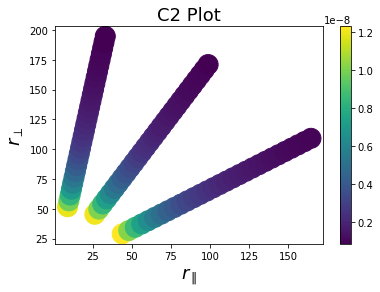

In [181]:
plt.scatter(R_par,R_per,c=np.diag(c2),s=400); FS=18
plt.colorbar()
plt.title('C2 Plot',fontsize=FS);plt.ylabel(r'$r_\perp$',fontsize=FS);plt.xlabel(r'$r_\parallel$',fontsize=FS);FS=16

# Diagonal Elements

In [182]:
#rmin=np.concatenate((np.logspace(np.log(20),np.log(50),11,base=np.e),(np.linspace(55,195,29))))

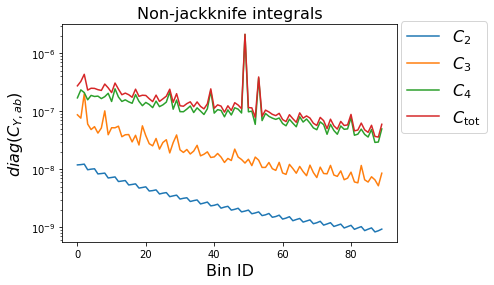

In [187]:
plt.plot(np.diag(c2),label=r'$C_2$')
plt.plot(np.diag(c3),label=r'$C_3$')
plt.plot(np.diag(c4),label=r'$C_4$')
plt.plot(np.diag(a**2.*c2+a*c3+c4),label=r'$C_\mathrm{tot}$')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);
plt.title('Non-jackknife integrals',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));

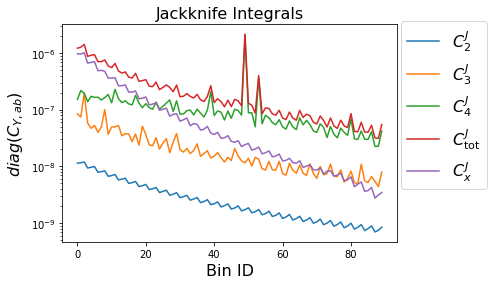

In [188]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals',fontsize=FS);
plt.yscale('log');

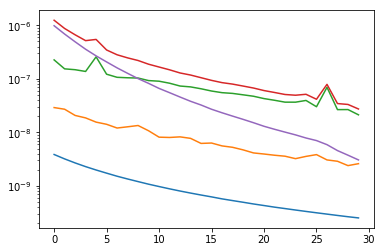

In [189]:
plt.plot(np.diag(c2save))
plt.plot(np.diag(c3save))
plt.plot(np.diag(c4save))
plt.plot(np.diag(c2save*a**2.+c3save*a+cxsave+c4save))
plt.plot(np.diag(cxsave))
plt.yscale('log')

In [190]:
plt.plot(np.diag(cxj)/np.diag(cxsave))
#plt.plot(np.diag(cxsave))

ValueError: operands could not be broadcast together with shapes (90,) (30,) 

In [191]:
c2save=c2j
c22save=c2
c33save=c3
c44save=c4
c3save=c3j
c4save=c4j
cxsave=cxj
RRsave=rr_true

## $RR_a$ Comparison

In [192]:
R1=50.;R2=200.;
vol = np.pi*4./3.*(R2**3.-R1**3.)
N_particles = 1e6
n_density = N_particles/vol

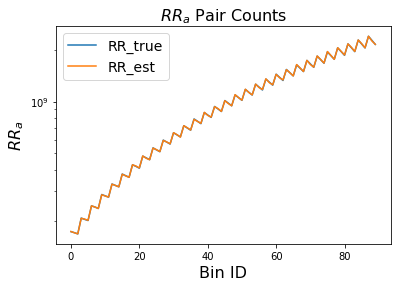

In [193]:
plt.plot(rr_true,label='RR_true')
plt.plot(rr_est,label='RR_est')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$RR_{a}$',fontsize=FS)
plt.legend(fontsize=FS-2);plt.title('$RR_a$ Pair Counts',fontsize=FS);

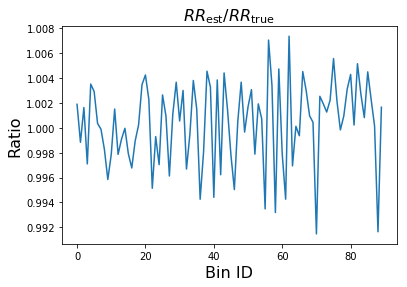

In [194]:
plt.plot((rr_est/rr_true))
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.ylabel('Ratio',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS);

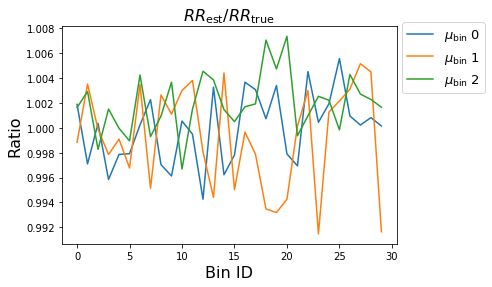

In [195]:
ratio_mu=np.zeros([m,len(rr_true)/m])
for i in range(len(rr_true)):
    ratio_mu[i%m,i/m]=rr_est[i]/rr_true[i]
for i in range(m):
    plt.plot(ratio_mu[i,:],label=r'$\mu_\mathrm{bin}$ %d' %i)
plt.legend(loc=9,bbox_to_anchor=(1.14,1.05),fontsize=FS-3)
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel('Ratio',fontsize=FS);

## Computing KL Divergences

In [196]:
cj_all = c2j+c3j+c4j+cxj
cj_no_x = c2j+c3j+c4j
cj_no_c3 = c2j+c4j+cxj
cj_no_c4 = c2j+c3j+cxj
precision_all = np.linalg.inv(cj_all)

def KL_div(precision_a,covariance_b):
    """Return negative log likelihood of the KL divergence (in first form)
    i.e. KL = Trace(precision*covariance) - log(det(precision)) - log(det(covariance)) - N_bins"""
    product = np.matmul(precision_a,covariance_b);
    N_bins=len(precision_a)
    logdetPrec = np.linalg.slogdet(precision_a)
    logdetCov = np.linalg.slogdet(covariance_b)
    if logdetPrec[0]!=1.:
        raise Exception('Undefined determinant')
    if logdetCov[0]!=1.:
        raise Exception('Undefined determinant')
    KL = np.matrix.trace(product) - logdetPrec[1] - logdetCov[1] - N_bins
    return KL
    

KL_x = KL_div(precision_all,cj_no_x)
KL_3 = KL_div(precision_all,cj_no_c3)
KL_4 = KL_div(precision_all,cj_no_c4)

print('Removing C_x^J: %.2f\nRemoving C_3^J: %.2f\nRemoving C_4^J: %.2f'%(KL_x,KL_3,KL_4))

Exception: Undefined determinant

In [26]:
tmp_rr=np.zeros(m*n);cnt=0.;rrs=[]
for i in range(30):
    rr_est,rr_true=read_RR_all(n,m,file_root_all,a,string=str(i))
    tmp_rr+=rr_est
    cnt+=1;
    if (cnt-1)%10==0:
        rrs.append(tmp_rr/cnt)
        #tmp_rr=np.zeros(180)
        #cnt=0.

IOError: ../GoslingSphere/All/RR_n30_m10_0.txt not found.

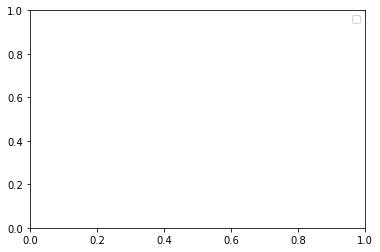

In [27]:
for i in range(len(rrs)):
    plt.plot(rrs[i]/rr_true,alpha=0.5,label=str(i))
plt.legend()

In [28]:
c4s=[];tmp_c4=np.zeros(n*m);cnt=0
for i in range(30):
    tc2,tc3,tc4,tc4err,tc_tot=read_c_all(n,m,file_root_all,a,str(i))
    tmp_c4+=np.diag(tc4);
    cnt+=1;
    if cnt==10:
        c4s.append(tmp_c4/cnt)
        tmp_c4=0.
        cnt=0

IOError: ../GoslingSphere/All/c2_n30_m10_0.txt not found.

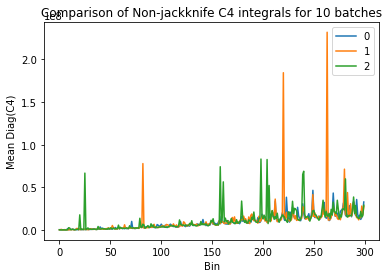

In [347]:
for i in range(3):
    plt.plot(c4s[i],label=i)
plt.title('Comparison of Non-jackknife C4 integrals for 10 batches');
plt.ylabel('Mean Diag(C4)')
plt.xlabel('Bin');plt.legend();